In [1]:
import os, sys

sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("__file__"))))
from nbafuns import *

fig_DIR = "../figs/teams/"
box_DIR = "../data/box/"

In [5]:
dfa = []
for season in range(2019,2025):
    df1 = pd.read_parquet(box_DIR + f"NBA_Box_T_Cum_Base_{season}.parquet")
    df2 = df1
    df2["Season"] = season +1
    dfa.append(df2)
df3 = pd.concat(dfa)

In [8]:
df3.columns

Index(['TEAM_ID', 'TEAM_NAME', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS',
       'PLUS_MINUS', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK',
       'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK',
       'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK',
       'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK',
       'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK',
       'Season'],
      dtype='object')

In [40]:
t = "Cleveland Cavaliers"
df4 = df3.query(f"TEAM_NAME == '{t}'")
df4["St"] = df4["FG3A_RANK"].astype(str)
df4

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,...,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,Season,St
5,1610612739,Cleveland Cavaliers,65,19,46,0.292,3145.0,2619,5715,0.458,...,21,28,30,29,1,29,27,28,2020,26
5,1610612739,Cleveland Cavaliers,72,22,50,0.306,3486.0,2778,6175,0.450,...,29,12,20,29,7,6,30,28,2021,28
5,1610612739,Cleveland Cavaliers,82,44,38,0.537,3946.0,3255,6940,0.469,...,22,26,24,15,1,11,25,13,2022,22
5,1610612739,Cleveland Cavaliers,82,51,31,0.622,3976.0,3408,6984,0.488,...,6,15,14,13,9,10,25,2,2023,24
5,1610612739,Cleveland Cavaliers,82,48,34,0.585,3961.0,3425,7148,0.479,...,17,19,21,17,5,16,20,13,2024,8
5,1610612739,Cleveland Cavaliers,25,21,4,0.840,1200.0,1124,2216,0.507,...,8,7,18,12,13,16,2,3,2025,8


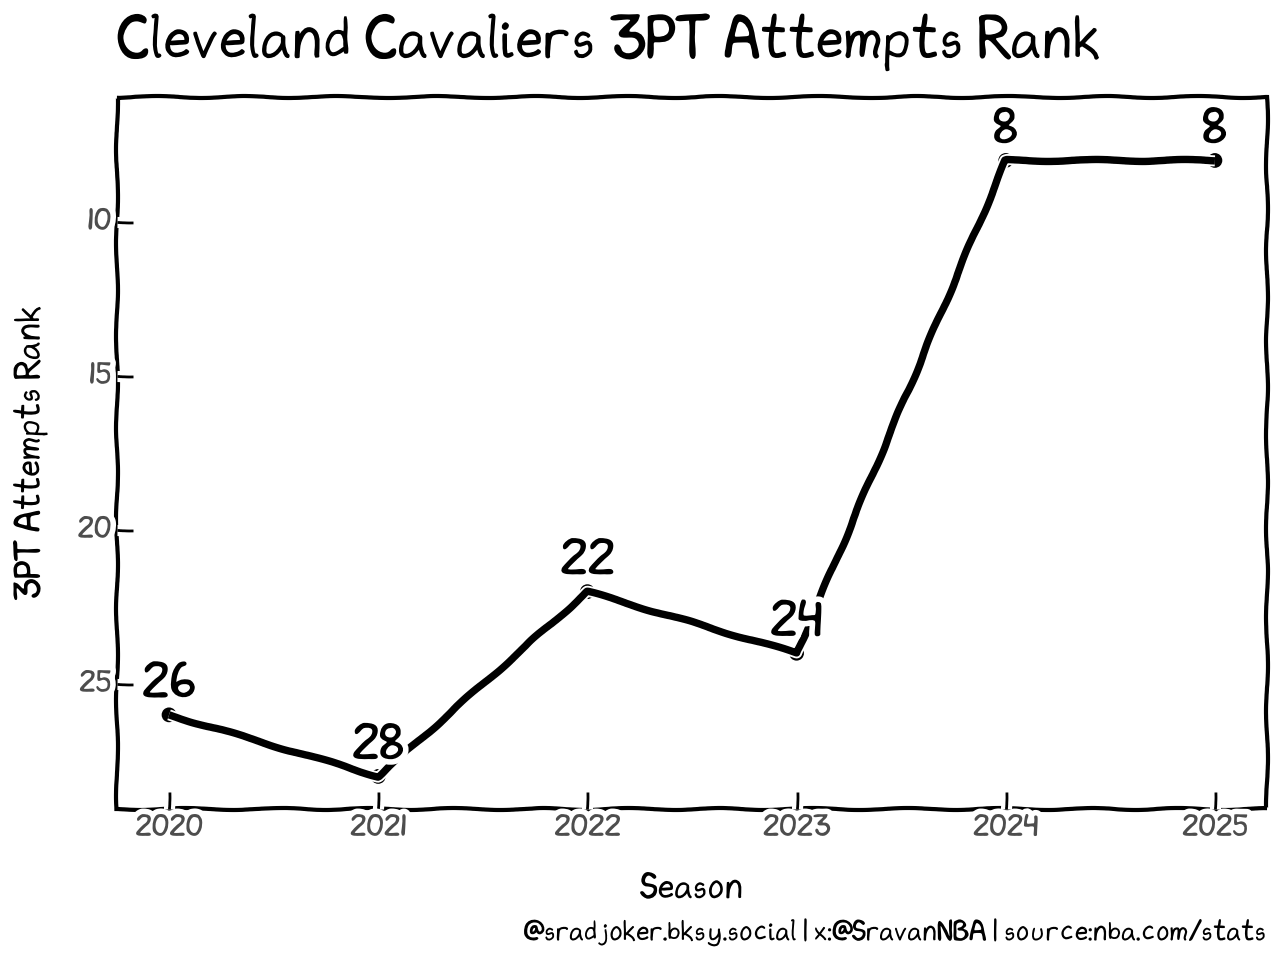

<Figure Size: (640 x 480)>

In [44]:
p = (
    ggplot(df4)
    + aes(x="Season",y="FG3A_RANK")
    + geom_point(size=2)
    + geom_line(size=1.5)
    # + geom_bar(stat="identity", alpha=0.5)
    + geom_text(aes(label="St"), size=16,nudge_y=1)
    + theme_idv
    +theme(
        plot_title=element_text(size=20)
    )
    + scale_y_reverse()
    + labs(
        title=f"{t} 3PT Attempts Rank",
        y="3PT Attempts Rank",
        caption="@sradjoker.bsky.social | x:@SravanNBA | source:nba.com/stats"
    )
)
p